### <p style="text-align: right;"> &#9999; Krrish Kishore Kumar</p>

# 24A: Regression
<br/>
<img src="https://media.geeksforgeeks.org/wp-content/uploads/20231129130431/11111111.png" width=500px/>

## Goals

- Introduce the concept of regression (remember, some classmates haven't covered this in their classes yet)
- Calculate linear regression based on the formula.
- Understand how linear regression is built into NumPy.



Regression defined

There are correlations between many data where the input directly affects the output. For example, the better the sports team, the more wins they achieve. At the same time, we have all seen a mediocre team make it to the finals through good luck.
This lets us know that not all data is perfect. Sometimes there are surprises and or mistakes. At the same time, there is a general trend in the data.

You can see these in many areas. For example, the less cloudy the night sky, the more stars can be seen. However, this is affected by other variables too such as light pollution. Light pollution creates "noise" in the data. However, it doesn't remove the general trend. As data scientists, we need to recognize the "noise" or "fluctuations" in the data and determine if they are valid. For example, it is possible the data was entered incorrectly. If the data is valid, we need to consider it, but stay focused on the overall relationship, which in this case is linear.

_Simple linear regression_ is a method you can use to find the line-of-best-fit. The line-of-best-fit takes into account the variation in data and provides a smoother function that gives the overall trend without distracting you with all of the "fluctuations".

In addition to _simple linear regression_, we will also explore _polynomial linear regression_. The key difference is that instead of a line-of-best-fit, we will be looking for a curve-of-best-fit. 

### Correlation: The relationship between two variables.
- Positive correlation where 0<m<=1 (think _slope_)
- Negative correlation where -1<=m<0 (think _slope_)
- Correlation coefficient is represented by _r_, determines the strength of the linear relationship between two variables

### Scatter plots and correlation
- Positive correlation (positive r-value) when the points appear to move upwards at a similar rate. Notice that the line-of-best fit has a similar slope in both situations (the _m_). But one is more closely correlated to the actual points on the graph than the other (the r-value).
- Negative correlation (negative r-value) when the points appear to move downwards at a similar rate.


<img src= "https://upload.wikimedia.org/wikipedia/commons/8/83/Pearson_Correlation_Coefficient_and_associated_scatterplots.png" width=450px>

### Correlation versus Regression
Correlation quantifies the strength of the linear relationship between a pair of variables. It is a single value ranging from -1 to 1.
Regression goes a step further and expresses the relationship as an equation, such as the line-of-best-fit when using _linear regression_. It allows us to graph the relationship and estimate where future values might lie on the graph.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/330px-Linear_least_squares_example2.svg.png" width =200px>
"In linear regression, the observations <font color=red><b> (red) </b></font> are assumed to be the result of random deviations <font color=green><b> (green) </b></font> from an underlying relationship <font color=blue><b> (blue) </b></font> between a dependent variable (y) and an independent variable (x)." (wikipedia)

----
## The Regression calculations _explained_

The first step is to understand how basic linear regression calculations are done. First, we need to understand the following:

- A coordinate is represented by:  $(x_i,y_i)$

- The sums, $\sum_i$, means that you sum up the expression that follows, similar to a loop for _i_ values.

- $N$ is the number of coordinates.

- The mean (average) of the x-values represented as:  $\bar{x} =\frac{1}{N}\sum_i x_i$

- The mean (average) of the y-values represented as:  $\bar{y} = \frac{1}{N}\sum_i y_i$

- Which then get substituted into: $ m = \frac{\sum_i [x_i y_i ]- N\bar{x}\bar{y}}{\sum_i [x_i^2] - N\bar{x}^2}$ and $ b = \bar{y} - m\bar{x}$.  
    Note: $ \sum_i $ only applies to what is in the brackets.

- Those results become the values in $\hat y = \hat m x + \hat b$.    The _hat_ `^` indicates that the values are estimates.



#### Watch this video

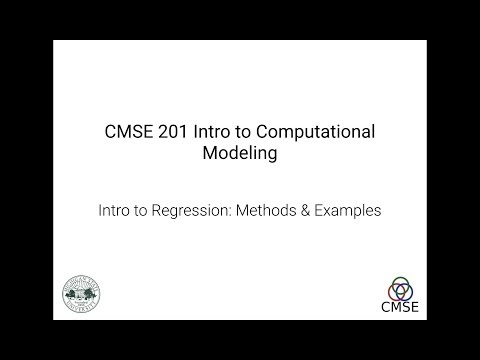

In [1]:
from IPython.display import YouTubeVideo  
YouTubeVideo("1YUHyBTztOc",width=640,height=360)

----

We have covered multiple ways to generate random values. In this activity you will see two specific ones:

1. np.random.normal()
2. np.linspace

____
The code below models simple linear regression using the ordinary least squares (OLS). **Comment the code to explain what each line is doing as it relates to the calculations.** 

In [2]:
# Remember to import the needed modules 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

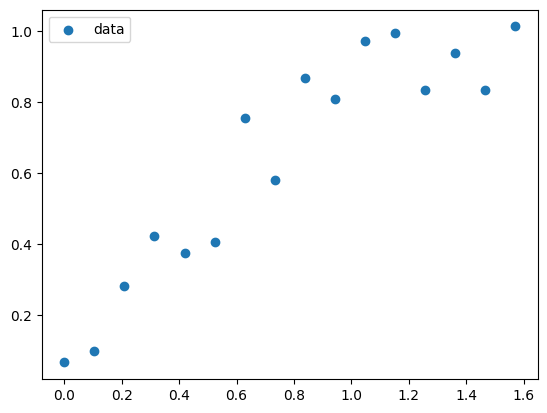

In [3]:
# Create an array of 16 equally spaced values from 0 to pi/2
x = np.linspace(0, np.pi/2, 16)

# Generate y values based on sine of x, plus random noise
# np.sin(x) calculates the sine of each value in x
# 0.1*np.random.randn(16) adds small random noise from normal distribution
y = np.sin(x) + 0.1*np.random.randn(16)

# Create a scatter plot of the data points
plt.scatter(x, y, label = "data")

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()

Look at the plot above. Notice that the relationship between $y$ and $x$ is roughly linear. This means we can use the ordinary least squares (OLS) approach to fit a line to the data. Below is a function that performs OLS.

**In the function below, comment the code where specified with a # and fill in the equation for calculating $b$, the y-intercept** Here are the calculations from above for you to refer back to.

$ m = \frac{\sum_i [x_i y_i ]- N\bar{x}\bar{y}}{\sum_i [x_i^2] - N\bar{x}^2}$ and $ b = \bar{y} - m\bar{x}$.............. Note: $ \sum_i $ only applies to what is in the brackets.

In [4]:
# This function is used to calculate ordinary least squares regression parameters given some data

def lin_reg_mb(x, y):
    
    # Calculate the mean of x values
    mean_x = np.mean(x)
    
    # Calculate the mean of y values
    mean_y = np.mean(y)
    
    # Get the number of data points
    N = len(x)
    
    # Calculate the sum of x*y products
    xy_sum = np.sum(x*y)
    
    # Calculate the sum of squared x values
    x2_sum = np.sum(x**2)
    
    
    # Calculate the slope (m) using the OLS formula
    # This implements the formula: m = (Σ(x_i*y_i) - N*x̄*ȳ) / (Σ(x_i^2) - N*x̄^2)
    m = (xy_sum - N * mean_x * mean_y)/(x2_sum - N*mean_x**2)

    # Calculate the y-intercept using the formula: b = ȳ - m*x̄
    # This is derived from solving y = mx + b for b
    b = mean_y - m * mean_x
    
    # Return the calculated slope (m) and y-intercept (b)
    # These parameters define our line of best fit
    return m, b


The function provided below (no changes to this function are needed) takes in our $x$ data and our estimated slope and intercept values and predict expected $y$ values. This is the function to use for the line-of-best-fit regression model.

In [5]:
''' The function below takes in the m (slope or x-coefficient), b (the y-intercept), and
the independent value, x, to calculate the expected the dependent value, y. Note, the m & b come 
from the function above. '''

def lin_regression(x, m, b):
    
    expected_y = m*x + b
    
    return expected_y

In the cell below, we call our finished `lin_reg_mb` function to calculate our parameters and then feed these into our `lin_regression` function to calculate our expected $y$ values.

**Comment the code below where specified!**

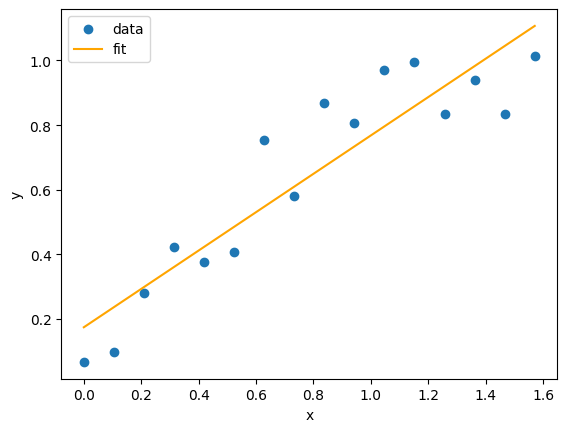

In [6]:
# Calculate the slope (m) and y-intercept (b) using our linear regression function
# These parameters will define our line of best fit
m_expected, b_expected = lin_reg_mb(x, y)

# Generate the predicted y-values using our linear regression model
# This applies the equation y = mx + b to each x value to get the corresponding y on our line of best fit
expected_y = lin_regression(x, m_expected, b_expected)

# Create a visualization of our data and regression line
# Scatter plot shows the original data points
plt.scatter(x, y, label = "data")
# Line plot shows our regression line (line of best fit)
plt.plot(x, expected_y, color = "orange", label = "fit")

# Add a legend to identify the data points and regression line
plt.legend()
# Label the x and y axes
plt.xlabel('x')
plt.ylabel('y')
# Display the plot showing both data points and regression line
plt.show()

**Print out your calculated m, slope, and b, y-intercept, values below. How do these values relate to $x$ and $y$? What does the y-intercept explain?**

<font size=+2> &#9999;&nbsp;<font> The y-intercept (b ≈ 0.1745) represents the value of y when x = 0. It's the starting point of our regression line on the y-axis. In this context, it provides the baseline value of y before any influence of x is considered.

In [10]:
# Type your code here
# Print the calculated slope (m) and y-intercept (b)
print(f"Slope (m): {m_expected:.4f}")
print(f"Y-intercept (b): {b_expected:.4f}")

Slope (m): 0.5936
Y-intercept (b): 0.1745


Describe your key learnings from this lesson.

<font size=+2> &#9999;&nbsp;<font>
    
- **Regression** helps identify trends in noisy data
- **Linear regression** finds the line-of-best-fit (y = mx + b) using ordinary least squares
- **Correlation** measures relationship strength (-1 to 1) while regression provides a predictive equation
- In our model:
    - Slope (m ≈ 0.5936): rate of change in y per unit x
    - Y-intercept (b ≈ 0.1745): baseline value when x = 0
- Successfully implemented regression in Python using NumPy and Matplotlib    